In [57]:
#Import relevant packages.
import pandas as pd
import numpy as np 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

from random import randrange
import matplotlib as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
#Load the data.
np_data = np.load('../data_processing/subj1_ses1.npy') #add the file here

In [16]:
df = pd.DataFrame(data = np_data,
                  index=[x for x in range(np_data.shape[0])],
                  columns=[x for x in range(np_data.shape[1])])

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,114254,114255,114256,114257,114258,114259,114260,114261,114262,114263
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
target_df = pd.read_csv('../annotation_data/sample_input_output.csv')[['trial_in_session', 
                                                                     'final_socnonsoc']]

In [29]:
targets = target_df['final_socnonsoc']

In [32]:
print(type(df.columns))

<class 'pandas.core.indexes.numeric.Int64Index'>


## PCA

In [35]:
#Scale the data.  
# scaler = MinMaxScaler()
# df.columns.reshape(1, -1)
# feature_scaled = scaler.fit_transform(df.columns)

# #Apply PCA
# pca = PCA(n_components=3)
# pca.fit(feature_scaled)
# feature_scaled_pca = pca.transform(feature_scaled)
# np.shape(feature_scaled_pca)

In [36]:
# feat_var = np.var(feature_scaled_pca, axis=0)
# feat_var_rat = feat_var/(np.sum(feat_var))

# print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

In [37]:
# target_list = df.final_socnonsoc.tolist()

# feature_scaled_pca_X0 = feature_scaled_pca[:, 0]
# feature_scaled_pca_X1 = feature_scaled_pca[:, 1]
# feature_scaled_pca_X2 = feature_scaled_pca[:, 2]

# labels = target_list
# colordict = {0:'red', 1:'blue'}
# piclabel = {0:'Non-Social', 1:'Social'}
# markers = {0:'o', 1:'-'}
# alphas = {0:0.3, 1:0.4}

# fig = plt.figure(figsize=(12, 7))
# plt.subplot(1,2,1)
# for l in np.unique(labels):
#     ix = np.where(labels==l)
#     plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
#                label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
# plt.xlabel("First Principal Component", fontsize=15)
# plt.ylabel("Second Principal Component", fontsize=15)

# plt.legend(fontsize=15)

# plt.subplot(1,2,2)
# for l1 in np.unique(labels):
#     ix1 = np.where(labels==l1)
#     plt.scatter(feature_scaled_pca_X0[ix1], feature_scaled_pca_X2[ix1], c=colordict[l1], 
#                label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
# plt.xlabel("First Principal Component", fontsize=15)
# plt.ylabel("Third Principal Component", fontsize=15)

# plt.subplot(2,2,2)
# for l1 in np.unique(labels):
#     ix1 = np.where(labels==l1)
#     plt.scatter(feature_scaled_pca_X1[ix1], feature_scaled_pca_X2[ix1], c=colordict[l1], 
#                label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
# plt.xlabel("Second Principal Component", fontsize=15)
# plt.ylabel("Third Principal Component", fontsize=15)

# plt.legend(fontsize=15)

# # plt.savefig('Cancer_labels_PCAs.png', dpi=200)
# plt.show()

## SVM

In [40]:
#Define the categories.
df['categories'] = targets
df['final_socnonsoc'] = target_df['final_socnonsoc']

In [ ]:
# 7221032

In [41]:
#Create X and y to hold input and output/target arrays.

#may need to resize X or change this, depending on form data actually comes in
X = np_data
y = df['final_socnonsoc'].to_numpy()

In [44]:
#Create violin plot for social vs. nonsocial and beta value.
# violin_plot = sns.violinplot(x=y, y=X, data=df)

In [45]:
#Visualize the model's performance.
# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')
# plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

In [47]:
#Split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [52]:
#Create grid search.
param_grid = {'C' : [0.1],#, 1, 10, 100],
              'gamma' : [0.0001],#, 0.001, 0.1, 1],
              'kernel' : ['rbf']}#, 'poly']}

svc = svm.SVC(probability=True)
model = GridSearchCV(svc,
                     param_grid)

In [53]:
#Fit the model to the training data.
model.fit(x_train,y_train)

#Show the best parameters.
print(model.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [56]:
#Make predictions with the model on the testing set.
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_pred,y_test)*100
print(f"The model is {acc_score}% accurate")

The model is 61.53846153846154% accurate


In [63]:
#Confusion Matrix
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[8, 0],
       [5, 0]])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


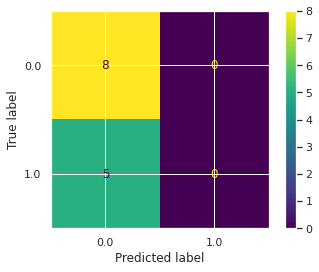

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(model, x_test, y_test)  
plt.show()